## Spiral Sample Selection

In [3]:
#imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sci

from astropy.io import fits

#data file that has all GZ2, NSA, Pipe3D, GEMA data for galaxies that are in both GZ2 and MaNGA databases
data = fits.open("emmyseniorthesisEVERYTHING.fits")
data = data[1].data


data["dnn"][(data["dnn"] < -100)] = 20 #fixes weird values in GEMA dnn column 

#main sample cuts to data
cut = data[
    (data["Z_1"] < 0.06)
    & (data["IFUDESIGNSIZE_1"] > 90)
    & (data["t01_smooth_or_features_a02_features_or_disk_debiased_1"] > 0.519)
    & (data["t02_edgeon_a05_no_debiased_1"] > 0.715)
    & (data["t03_bar_a06_bar_debiased_1"] < 0.3)
    & (data['t08_odd_feature_a24_merger_fraction'] < 0.4)
    & (data["dnn"] > 0.2)
]
print('data has:', len(data),'galaxies')
print('cut has :',len(cut),'galaxies')

#cut to get clear spirals; could also cut on number of arms 
spiralcut = cut[(cut["t04_spiral_a08_spiral_debiased_1"] > 0.519)] #& (cut["t11_arms_number_a32_2_debiased"] > 0.619)]
print('spiralcut has:', len(spiralcut),'galaxies')

#cut to make sure that at least 20 volunteers voted on each galaxy 
Number = (
    spiralcut["t10_arms_winding_a28_tight_count_1"]
    + spiralcut["t10_arms_winding_a29_medium_count_1"]
    + spiralcut["t10_arms_winding_a30_loose_count_1"]
)

spiralcut = spiralcut[Number > 20]
print('new spiralcut has:', len(spiralcut),'galaxies')

data has: 9585 galaxies
cut has : 558 galaxies
spiralcut has: 458 galaxies
new spiralcut has: 311 galaxies


In [5]:
#function to calculate winding score for each galaxy
#equation comes from Hart et al 2017
def winding_score(medium, tight):
    w_avg = 0.5 * medium + 1.0 * tight
    return w_avg

mediumfrac = spiralcut["t10_arms_winding_a29_medium_debiased_1"]
tightfrac = spiralcut["t10_arms_winding_a28_tight_debiased_1"]
windscore = winding_score(mediumfrac, tightfrac)

print(len(windscore))

311


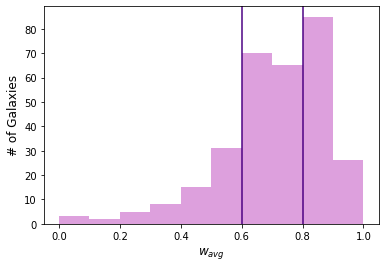

In [6]:
plt.hist(windscore, color="plum", range=(0, 1))
plt.xlabel(r'$w_{avg}$', size = 12)
plt.ylabel("# of Galaxies", size = 12)
plt.axvline(0.6, color = 'indigo')
plt.axvline(0.8, color = 'indigo')

windingscore_name = 'Plots/windingscore.pdf'
plt.savefig(windingscore_name, bbox_inches='tight')

In [7]:
#separating our parent sample into bins based on arm winding levels--determined by histogram plotted above
tightsample = spiralcut[windscore > 0.8]
mediumsample = spiralcut[(windscore < 0.8) & (windscore > 0.6)]
loosesample = spiralcut[windscore < 0.6]

print("Tight: ", len(tightsample))
print("Medium: ", len(mediumsample))
print("Loose: ", len(loosesample))

Tight:  112
Medium:  135
Loose:  64


In [8]:
#turn winding scores into pitch angles using equation from Masters et al 2019
def pitchangle(winding_score):
    return 25.6 - 10.5*winding_score

pitch_angle = pitchangle(windscore)

311
19.3
17.200000000000003
14.350000000000001
25.6


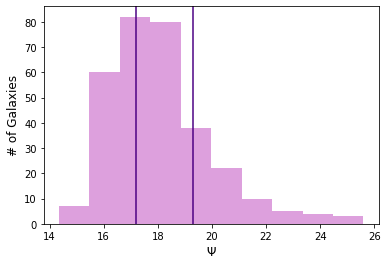

In [10]:
plt.hist(pitch_angle, color="plum")
plt.xlabel(r'$\Psi$', size = 12)
plt.ylabel("# of Galaxies", size = 12)
plt.axvline(17.2, color = 'indigo')
plt.axvline(19.3, color = 'indigo')

pitchangle_name = 'Plots/pitchangle_hist.pdf'
plt.savefig(pitchangle_name, bbox_inches='tight')

Text(0.5, 1.0, "GEMA 'dnn' value")

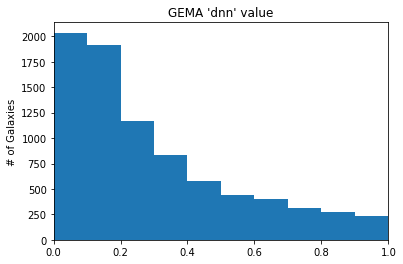

In [9]:
#GEMA dnn value is distance to next nearest neighbor in kpc-- we cut around 0.7 in main sample cuts above
#this just shows us what those values are for the whole sample that we started with 
plt.hist(data["dnn"], range = (0, 1))
plt.xlim([0, 1])
plt.ylabel("# of Galaxies")
plt.title("GEMA 'dnn' value")

Text(0, 0.5, 'GEMA dnn value')

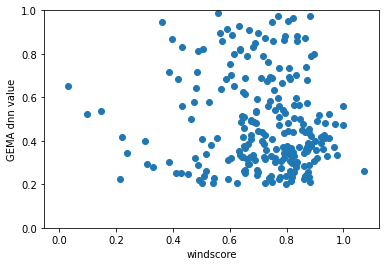

In [11]:
plt.scatter(windscore, spiralcut["dnn"])
plt.ylim(0,1)
plt.xlabel("windscore")
plt.ylabel("GEMA dnn value")

Text(0.5, 0, 'GEMA dnn value')

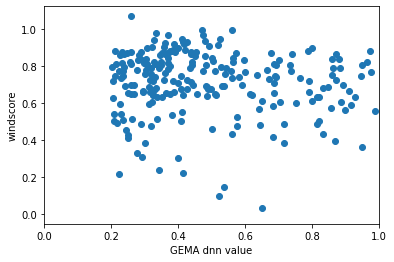

In [12]:
plt.scatter(spiralcut["dnn"],windscore)
plt.xlim(0,1)
plt.ylabel("windscore")
plt.xlabel("GEMA dnn value")

Text(0.5, 1.0, 'Winding score dnn>1 galaxies')

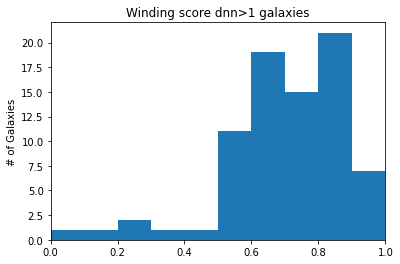

In [13]:
plt.hist(windscore[(spiralcut["dnn"]>1)], range = (0, 1))
plt.xlim([0, 1])
plt.ylabel("# of Galaxies")
plt.title("Winding score dnn>1 galaxies")

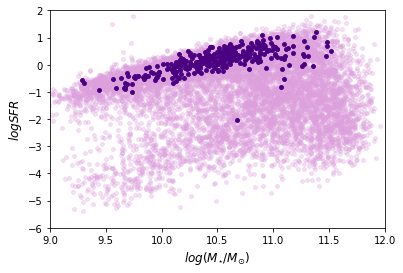

In [40]:
#plotting our sample of galaxies in while MaNGA sample to see where it lies 
plt.scatter(data["log_Mass"], data["log_SFR_Ha"], s = 15, color = 'plum', alpha = 0.3)
plt.scatter(spiralcut["log_Mass"], spiralcut["log_SFR_Ha"], s = 15, color = 'indigo')
plt.xlim(9,12)
plt.ylim(-6, 2)
plt.xlabel(r'$log(M_{\star}/M_{\odot})$', fontsize = 12)
plt.ylabel('$logSFR$', fontsize = 12)

#our sample mostly in star forming sequence--makes sense
masssfr_name = 'Plots/massSFR.pdf'
plt.savefig(masssfr_name, bbox_inches='tight')

In [1]:
#similar plot as above-- purpose is to see how our sample fits within the whole MaNGA sample 
plt.scatter(data["log_Mass"], data["nsa_redshift"], s=2, color = 'plum', alpha = 0.3)
plt.scatter(spiralcut["log_Mass"], spiralcut["nsa_redshift"], s=2, color = 'indigo')
plt.xlim(9,12)
#plt.ylim(-6, 2)#look up units
plt.xlabel(r'$log(M_{\star}/M_{\odot})$', fontsize = 12)
plt.ylabel('redshift', fontsize = 12)

#mixture from primary and secondary sample, bundle reaches to larger radius 
#put in thesis!!! 

masssz_name = 'Plots/massz.pdf'
plt.savefig(masssz_name, bbox_inches='tight')

NameError: name 'plt' is not defined

Text(0, 0.5, '# of galaxies')

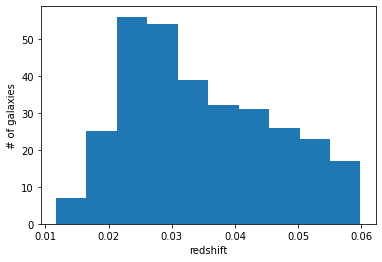

In [17]:
plt.hist(spiralcut["nsa_redshift"])
plt.xlabel('redshift')
plt.ylabel('# of galaxies')

In [18]:
#more imports-- I found that running these later in the notebook makes the earlier plots run faster
import marvin
from marvin import config
#config.forceDbOff()
config.setRelease("DR17")

import marvin.utils.plot.map as mapplot
from marvin.tools.image import Image
from marvin.tools.maps import Maps
from marvin.utils.plot.scatter import plot

/packages/python3.7.7/lib/python3.7/site-packages/sdss_marvin-2.7.1-py3.7.egg/marvin/core/exceptions.py:51: UserWarning: cannot initiate Sentry error reporting: [Errno 6] No such device or address.
  UserWarning)
[INFO]: No release version set. Setting default to DR17
[WARNING]: path /homes/ewisz/sas/mangawork/manga/spectro/redux/v3_1_1/drpall-v3_1_1.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
[WARNING]: path /homes/ewisz/sas/mangawork/manga/spectro/analysis/v3_1_1/3.1.0/dapall-v3_1_1-3.1.0.fits cannot be found. Setting dapall to None. (MarvinUserWarning)
[WARNING]: path /homes/ewisz/sas/mangawork/manga/spectro/redux/v3_1_1/drpall-v3_1_1.fits cannot be found. Setting drpall to None. (MarvinUserWarning)
[WARNING]: path /homes/ewisz/sas/mangawork/manga/spectro/analysis/v3_1_1/3.1.0/dapall-v3_1_1-3.1.0.fits cannot be found. Setting dapall to None. (MarvinUserWarning)


In [19]:
#need these lists for obtaining MaNGA data later
loose_plateifu = loosesample['PLATEIFU_1']
medium_plateifu = mediumsample['PLATEIFU_1']
tight_plateifu = tightsample['PLATEIFU_1']
loose_mass = loosesample['log_Mass']
medium_mass = mediumsample['log_Mass']
tight_mass= tightsample['log_Mass']
#print(tight_plateifu)

## Creating and Saving Metallicity Gradients

In [20]:
#func for metallicity values from pettini & pagel 2004
#ratio is NII/Ha flux values 
def metallicity(ratio):
    return 8.90 + 0.57 * np.log10(ratio)

#fun to create a metallicity trend for an indivudal galaxy 
def metalgradient(galaxy):

    # Get data for galaxy
    maps = Maps(galaxy)
    nii = maps.emline_gflux_nii_6585
    ha = maps.emline_gflux_ha_6564
    radius = maps.spx_ellcoo_r_re

    # Metallicity calc
    n2 = nii / ha
    metal = 8.90 + 0.57 * np.log10(n2)

    # Masks
    masks = maps.get_bpt(
        return_figure=False, show_plot=False
    )  # Version of BPT which only returns mask
    sf = masks["sf"]["global"]
    mask_non_sf = ~sf * n2.pixmask.labels_to_value("DONOTUSE")
    mask_bad_data = n2.pixmask.get_mask("UNRELIABLE")
    high_snr = mapplot.mask_low_snr(value=ha.value, ivar=ha.ivar, snr_min=3)
    master_mask = mask_non_sf | mask_bad_data | high_snr
    
   
    metal_mean, radius_mean, binnumber = sci.binned_statistic(
        radius.value[master_mask == 0],
        metal.value[master_mask == 0],
        bins=20,
        range=[0, 2.0],
        )
    
    return metal_mean, radius_mean #lists of values corresponding to individual spaxels in galaxy 

[WARNING]: divide by zero encountered in power (RuntimeWarning)


Successful 8144-12703


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 10215-12702


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8555-12705


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8613-12702


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8247-12703


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8148-9102


[WARNING]: divide by zero encountered in power (RuntimeWarning)


Successful 8147-12703


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8994-12701


[WARNING]: divide by zero encountered in power (RuntimeWarning)


Successful 8947-9102


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8991-12703


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 11957-12704


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8145-12704


[WARNING]: divide by zero encountered in power (RuntimeWarning)


Successful 9485-12705


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8453-12705


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 9186-12705


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 7960-12705


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 9191-12703


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 7968-12702


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 10520-9101


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)


Successful 10519-12704


[WARNING]: divide by zero encountered in power (RuntimeWarning)


Successful 11761-12703


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 11016-12704


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8593-12704


[WARNING]: divide by zero encountered in power (RuntimeWarning)


Successful 8596-9101


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8486-12701


[WARNING]: divide by zero encountered in power (RuntimeWarning)


Successful 8603-9102


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)


Successful 8604-12701


[WARNING]: divide by zero encountered in power (RuntimeWarning)


Successful 12673-9101


[WARNING]: divide by zero encountered in power (RuntimeWarning)


Successful 8550-9102


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 10511-12704


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 9498-12705


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 9503-12702


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 10506-9101


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 11832-12702


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8325-12705


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8326-12702


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 9036-12704


[WARNING]: divide by zero encountered in power (RuntimeWarning)


Successful 8332-9101


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8255-12705


[WARNING]: divide by zero encountered in power (RuntimeWarning)


Successful 8263-12705


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8262-12704


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8336-12703


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)


Successful 9027-12701


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 11984-12701


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8993-12702


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8946-9101


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 10498-12704


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 10505-9101


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8657-9101


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8657-12701


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8657-12702


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 9089-12704


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 9095-12704


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 11017-12705


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8137-12702


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8137-12703


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 9493-12704


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 9501-9102


[WARNING]: divide by zero encountered in power (RuntimeWarning)


Successful 8568-12705


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 12624-12702


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8321-12703


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8446-9101
Problems with:


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 12622-12703


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8443-12705


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8135-12702


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 9087-12705


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 11004-12705


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8241-12704


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8243-12701


[WARNING]: divide by zero encountered in power (RuntimeWarning)


Successful 8248-12704


[WARNING]: divide by zero encountered in power (RuntimeWarning)


Successful 11010-12705


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8311-12703


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 12511-12703


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 10224-9101


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)


Successful 11981-12702


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 11743-12705


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 10501-12704


[WARNING]: divide by zero encountered in power (RuntimeWarning)


Successful 11865-12704


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 12489-12703


[WARNING]: divide by zero encountered in power (RuntimeWarning)


Successful 9879-9101


[WARNING]: divide by zero encountered in power (RuntimeWarning)


Successful 11978-12705


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8616-12704


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 10515-9102


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 10520-12704


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8546-12704


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8561-12701


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8482-9101


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8548-12703


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 7443-12702


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8087-9102


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8088-9101


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8089-12704


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 11833-9102


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 12683-9102


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8610-12704


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 10510-12703


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 9089-12702


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8157-12701


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 9514-12701


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 9188-9102


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 9189-9101


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8727-12701


[WARNING]: divide by zero encountered in power (RuntimeWarning)


Successful 8727-12702


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8138-9101


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8613-12701


[WARNING]: divide by zero encountered in power (RuntimeWarning)


Successful 12083-9102


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8443-12702


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8313-12704
Problems with:


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 8593-12701


[WARNING]: divide by zero encountered in power (RuntimeWarning)


Successful 11830-12704


[WARNING]: divide by zero encountered in power (RuntimeWarning)


Successful 10497-9102


[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)


Successful 11982-12704
['8446-9101', '8313-12704']
2


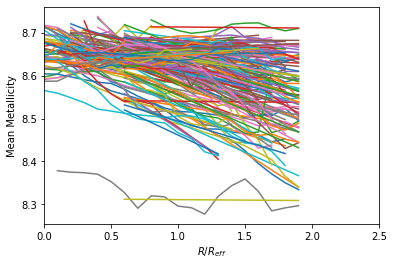

In [31]:
# Now how about running this on a list of MaNGA galaxies. We'll make it a short list to start with.
#test on a few (3) galaxies to start with-- longer lists take MUCH longer to finish running 

#Plateifu_list = ['8998-12701','8998-12702','8998-12705']
Plateifu_list = tight_plateifu

error_list = []
r_list = []
y_list = []
name_list = []
mass_list =[]
j = 0
plateifu_list = []
slope_list = []
intercept_list = []

plt.plot()
plt.xlim(0, 2.5)
#plt.legend()
#plt.ylim(8.4, 8.8)
plt.xlabel(r"$ R/R_{eff}$")
plt.ylabel("Mean Metallicity")

for plateifu in Plateifu_list:
    try:
        y, x = metalgradient(plateifu)
        plt.plot(x[:-1], y, label = plateifu)
        y_list.append(y)
        r_list.append(x[:-1])  # Fence post issue
        count = len(y)
        for i in range(count):
            name_list.append(plateifu)
            mass_list.append(tight_mass[j]) #make sure tight/loose/medium mass matches input list
        print("Successful", plateifu)
        j = j+1
        #get rid of nan values here
        r = x[:-1]
        r_fit = r[np.logical_not(np.isnan(y))]
        y_fit = y[np.logical_not(np.isnan(y))]
        regression = sci.linregress(r_fit[(r_fit > 0.5)], y_fit[(r_fit > 0.5)])
        slope_list.append(regression.slope)
        intercept_list.append(regression.intercept)
        y_plot = regression.intercept+regression.slope*r_fit[(r_fit > 0.5)]
        plt.plot(r_fit[(r_fit > 0.5)],y_plot)
        plateifu_list.append(plateifu)
    except:
        error_list.append(plateifu)
        print("Problems with:")
    continue

print(error_list)
print(len(error_list))

In [32]:
#these need to all be the same length for the next cell to work 
print(len(slope_list))
print(len(intercept_list))
print(len(r_list))
print(len(plateifu_list))

110
110
112
110


In [33]:
# This also outputs a list of all the values of averaged radii and metallicity. 
# It outputs a list of arrays, so we need to convert to a single array to do things. 

r=np.concatenate(r_list, axis=0)
y=np.concatenate(y_list, axis=0)

#I've changed these a bunch of times to get what I want into a fits file from the cell that runs over all galaxies
#minimum need radius and metallicity value
from astropy.table import Table
t = Table([plateifu_list, slope_list, intercept_list], names = ('name', 'slope', 'intercept'))
t.write('tight_regression.fits', format='fits')

print(len(r))
print(len(y))

#Clean out nan values because they break the next step
r = r[np.logical_not(np.isnan(y))]
y = y[np.logical_not(np.isnan(y))]

#print,y


2240
2240


In [7]:
tightgrad = fits.open("tightsamplegradient_test_klm.fits")
tightgrad = tightgrad[1].data

In [24]:
tight_r = tightgrad['radius']
tight_m = tightgrad['metallicity']

tight_r = tight_r[np.logical_not(np.isnan(tight_m))]
tight_m = tight_m[np.logical_not(np.isnan(tight_m))]

10.6022668998827


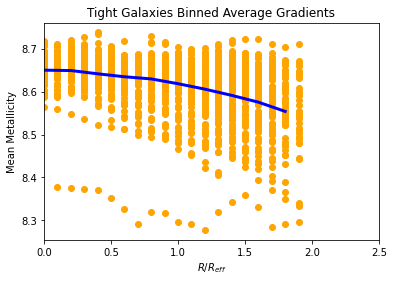

In [10]:
#Then this should work to make a single average plot for the sample of galaxies. 

plt.scatter(tight_r,tight_m, color = 'orange') #Use this to check where the values are which are being averaged 

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(tight_r,tight_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'blue', linewidth = 3)

plt.xlim(0,2.5)
#plt.ylim(8.4,8.8)
plt.xlabel(r'$ R/R_{eff}$')
plt.ylabel('Mean Metallicity')
plt.title('Tight Galaxies Binned Average Gradients')

tightavggrad_name = 'Plots/tightbinnedgradients.pdf'
plt.savefig(tightavggrad_name, bbox_inches='tight')

## Mass Sample Selection 

In [2]:
#read in new file that just has plateifus, mass, and metallicity trend data
loosegrad = fits.open("loosemetalandmass.fits")
loosegrad = loosegrad[1].data

loose_r = loosegrad['radius']
loose_m = loosegrad['metallicity']

loose_r = loose_r[np.logical_not(np.isnan(loose_m))]
loose_m = loose_m[np.logical_not(np.isnan(loose_m))]


NameError: name 'fits' is not defined

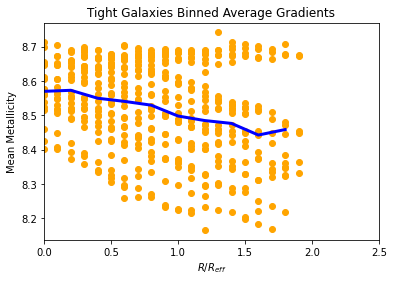

In [56]:
#Then this should work to make a single average plot for the sample of galaxies. 
#repeated step above on loosely wound galaxy sample 

plt.scatter(loose_r,loose_m, color = 'orange') #Use this to check where the values are which are being averaged. May not always need it. 

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(loose_r,loose_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'blue', linewidth = 3)

plt.xlim(0,2.5)
#plt.ylim(8.4,8.8)
plt.xlabel(r'$ R/R_{eff}$')
plt.ylabel('Mean Metallicity')

looseavggrad_name = 'Plots/loosebinnedgradients.pdf'
plt.savefig(looseavggrad_name, bbox_inches='tight')

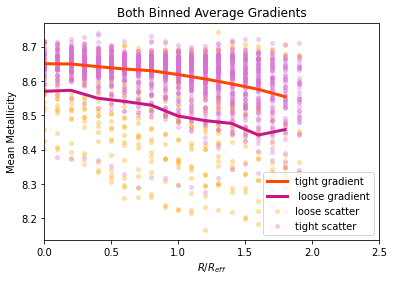

In [32]:
#plot the two previous plots together for comparison 
plt.scatter(loose_r,loose_m, alpha = 0.3, color = 'orange', label = 'loose scatter', s = 15) #Use this to check where the values are which are being averaged. May not always need it. 

plt.scatter(tight_r,tight_m, alpha = 0.3, color = 'orchid', label = 'tight scatter', s = 15) #Use this to check where the values are which are being averaged. May not always need it. 

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(tight_r,tight_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, linewidth = 3, color = 'orangered', label = 'tight gradient')

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(loose_r,loose_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, linewidth = 3, color = 'mediumvioletred', label = ' loose gradient')

plt.xlim(0,2.5)
#plt.ylim(8.4,8.8)
plt.xlabel(r'$ R/R_{eff}$')
plt.ylabel('Mean Metallicity')
plt.title('Both Binned Average Gradients')
plt.legend()

bothavggrad_name = 'Plots/bothbinnedgradients.pdf'
plt.savefig(bothavggrad_name, bbox_inches='tight')

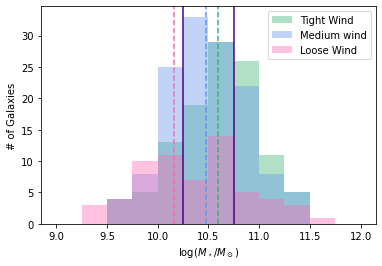

In [9]:
#create a mass histogram of the three arm winding level samples to determine mass selections 
plt.hist(
    tightsample["log_Mass"],
    bins=[9, 9.25,9.5,9.75, 10,10.25, 10.5,10.75, 11,11.25, 11.5,11.75, 12],
    label="Tight Wind",
    #density=True,
    alpha=0.4,
    color = 'mediumseagreen',
)

plt.hist(
    mediumsample["log_Mass"],
    bins=[9, 9.25,9.5,9.75, 10,10.25, 10.5,10.75, 11,11.25, 11.5,11.75, 12],
    label="Medium wind",
    #density=True,
    alpha=0.4,
    color = 'cornflowerblue'
)

plt.hist(
    loosesample["log_Mass"],
    bins=[9, 9.25,9.5,9.75, 10,10.25, 10.5,10.75, 11,11.25, 11.5,11.75, 12],
    label="Loose Wind",
    #density=True,
    alpha=0.4,
    color = 'hotpink'
)
plt.axvline(10.25, color = 'indigo')
plt.axvline(10.75, color = 'indigo')
plt.xlabel(r'$\log (M_\star/M_\odot)$')
plt.ylabel("# of Galaxies")
plt.legend()

plt.axvline(10.60, linestyle = "--", color = 'mediumseagreen')
plt.axvline(10.48, linestyle = "--", color = 'cornflowerblue')
plt.axvline(10.16, linestyle = "--", color = 'hotpink')

masshist_name = 'Plots/masshist_withmedium.pdf'
plt.savefig(masshist_name, bbox_inches='tight')

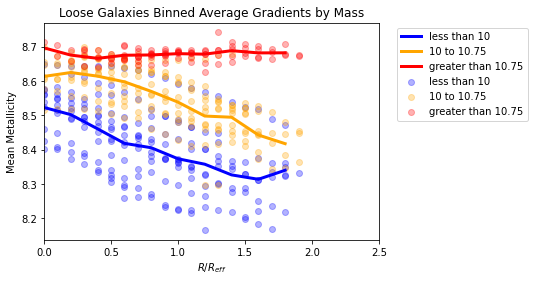

In [5]:
#separating loosely wound arms into mass bins 
#making same scatter and binned statistic plots as above but for three separate mass bins within loose arm winding
#want to make sure that the binned statistic trends actually map the scatter well
loose_low = loosegrad[(loosegrad["mass"] < 10)]
loose_mid = loosegrad[(loosegrad["mass"] > 10) & (loosegrad["mass"] < 10.75)]
loose_high = loosegrad[(loosegrad['mass'] > 10.75)]

loose_low_r = loose_low['radius']
loose_low_m = loose_low['metallicity']
loose_low_r = loose_low_r[np.logical_not(np.isnan(loose_low_m))]
loose_low_m = loose_low_m[np.logical_not(np.isnan(loose_low_m))]

loose_mid_r = loose_mid['radius']
loose_mid_m = loose_mid['metallicity']
loose_mid_r = loose_mid_r[np.logical_not(np.isnan(loose_mid_m))]
loose_mid_m = loose_mid_m[np.logical_not(np.isnan(loose_mid_m))]

loose_high_r = loose_high['radius']
loose_high_m = loose_high['metallicity']
loose_high_r = loose_high_r[np.logical_not(np.isnan(loose_high_m))]
loose_high_m = loose_high_m[np.logical_not(np.isnan(loose_high_m))]

#fit a linear regression to the scatter to get gradient and offset
loose_low_res = sci.linregress(loose_low_r, loose_low_m)
loose_mid_res = sci.linregress(loose_mid_r, loose_mid_m)
loose_high_res = sci.linregress(loose_high_r, loose_high_m)

plt.scatter(loose_low_r,loose_low_m, color = 'blue', alpha = 0.3, label = 'less than 10') #Use this to check where the values are which are being averaged. May not always need it. 

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(loose_low_r,loose_low_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'blue', linewidth = 3, label = 'less than 10')

plt.scatter(loose_mid_r,loose_mid_m, color = 'orange', alpha = 0.3, label = '10 to 10.75') #Use this to check where the values are which are being averaged. May not always need it. 

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(loose_mid_r,loose_mid_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'orange', linewidth = 3, label = '10 to 10.75')

plt.scatter(loose_high_r,loose_high_m, color = 'red', alpha = 0.3, label = 'greater than 10.75') #Use this to check where the values are which are being averaged. May not always need it. 

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(loose_high_r,loose_high_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'red', linewidth = 3, label = 'greater than 10.75')

plt.xlim(0,2.5)
#plt.ylim(8.4,8.8)
plt.xlabel(r'$ R/R_{eff}$')
plt.ylabel('Mean Metallicity')
plt.title('Loose Galaxies Binned Average Gradients by Mass')
plt.legend(bbox_to_anchor=(1.04, 1))

loose_grad_mass_name = 'Plots/loosebinnedgradients_mass.pdf'
plt.savefig(loose_grad_mass_name, bbox_inches='tight')

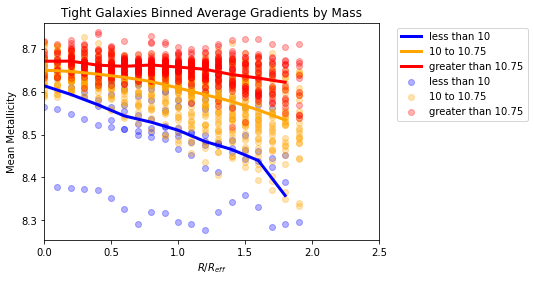

In [76]:
#same as above but for tightly wound galaxies
tight_low = tightgrad[(tightgrad["mass_1"] < 10)]
tight_mid = tightgrad[(tightgrad["mass_1"] > 10) & (tightgrad["mass_1"] < 10.75)]
tight_high = tightgrad[(tightgrad['mass_1'] > 10.75)]

tight_low_r = tight_low['radius']
tight_low_m = tight_low['metallicity']
tight_low_r = tight_low_r[np.logical_not(np.isnan(tight_low_m))]
tight_low_m = tight_low_m[np.logical_not(np.isnan(tight_low_m))]

tight_mid_r = tight_mid['radius']
tight_mid_m = tight_mid['metallicity']
tight_mid_r = tight_mid_r[np.logical_not(np.isnan(tight_mid_m))]
tight_mid_m = tight_mid_m[np.logical_not(np.isnan(tight_mid_m))]

tight_high_r = tight_high['radius']
tight_high_m = tight_high['metallicity']
tight_high_r = tight_high_r[np.logical_not(np.isnan(tight_high_m))]
tight_high_m = tight_high_m[np.logical_not(np.isnan(tight_high_m))]

#fit a linear regression to the scatter to get a gradient and offset
tight_low_res = sci.linregress(tight_low_r, tight_low_m)
tight_mid_res = sci.linregress(tight_mid_r, tight_mid_m)
tight_high_res = sci.linregress(tight_high_r, tight_high_m)


plt.scatter(tight_low_r,tight_low_m, color = 'blue', alpha = 0.3, label = 'less than 10') #Use this to check where the values are which are being averaged. May not always need it. 

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(tight_low_r,tight_low_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'blue', linewidth = 3, label = 'less than 10')

plt.scatter(tight_mid_r,tight_mid_m, color = 'orange', alpha = 0.3, label = '10 to 10.75') #Use this to check where the values are which are being averaged. May not always need it. 

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(tight_mid_r,tight_mid_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'orange', linewidth = 3, label = '10 to 10.75')

plt.scatter(tight_high_r,tight_high_m, color = 'red', alpha = 0.3, label = 'greater than 10.75') #Use this to check where the values are which are being averaged. May not always need it. 

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(tight_high_r,tight_high_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'red', linewidth = 3, label = 'greater than 10.75')

plt.xlim(0,2.5)
#plt.ylim(8.4,8.8)
plt.xlabel(r'$ R/R_{eff}$')
plt.ylabel('Mean Metallicity')
plt.title('Tight Galaxies Binned Average Gradients by Mass')
plt.legend(bbox_to_anchor=(1.04, 1))

tight_grad_mass_name = 'Plots/tightbinnedgradients_mass.pdf'
plt.savefig(tight_grad_mass_name, bbox_inches='tight')

In [85]:
print(tight_low_res)
print(tight_mid_res)
print(tight_high_res)

LinregressResult(slope=-0.11583989755450155, intercept=8.623960385812406, rvalue=-0.536536080943931, pvalue=1.9820934091425764e-11, stderr=0.01579838735256268, intercept_stderr=0.015123359538171129)
LinregressResult(slope=-0.06316338970701388, intercept=8.668161104744046, rvalue=-0.5475207131567579, pvalue=6.39262216076375e-81, stderr=0.0030240945820336714, intercept_stderr=0.003153344173620618)
LinregressResult(slope=-0.025248443948111075, intercept=8.678208789519246, rvalue=-0.3881071235872836, pvalue=6.24263181265694e-22, stderr=0.0025156952280248677, intercept_stderr=0.002665674958196785)


In [86]:
print(loose_low_res)
print(loose_mid_res)
print(loose_high_res)

LinregressResult(slope=-0.12772835436833652, intercept=8.518912559551358, rvalue=-0.5600194293854057, pvalue=9.67392549928366e-18, stderr=0.013497021490868417, intercept_stderr=0.012888907808929675)
LinregressResult(slope=-0.11879302503525492, intercept=8.657160622771288, rvalue=-0.6797013062741448, pvalue=9.574123514139477e-26, stderr=0.009608518920775737, intercept_stderr=0.009611988037464114)
LinregressResult(slope=0.005624646505958523, intercept=8.672684879805285, rvalue=0.14516609727921956, pvalue=0.1771867169239996, stderr=0.0041338614490235084, intercept_stderr=0.004468848323437949)


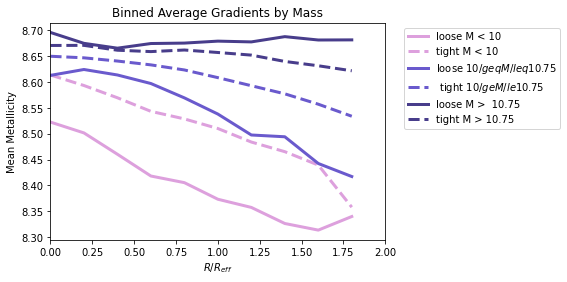

In [84]:
#plots binned averages for both tight and loosely wound arms for the three mass samples
meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(loose_lessthan10_r,loose_lessthan10_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'plum', linewidth = 3, label = 'loose M < 10')

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(tight_lessthan10_r,tight_lessthan10_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'plum', linewidth = 3, label = 'tight M < 10', linestyle = '--')

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(loose_10to1075_r,loose_10to1075_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'slateblue', linewidth = 3, label = (r'loose $ 10/geq M /leq 10.75$'))

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(tight_10to1075_r,tight_10to1075_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'slateblue', linewidth = 3, label = (r' tight $10/ge M /le 10.75$'), linestyle = '--')

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(loose_greaterthan1075_r,loose_greaterthan1075_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'darkslateblue', linewidth = 3, label = 'loose M >  10.75')

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(tight_greaterthan1075_r,tight_greaterthan1075_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'darkslateblue', linewidth = 3, label = 'tight M > 10.75', linestyle = '--')

plt.xlim(0,2)
#plt.ylim(8.4,8.8)
plt.xlabel(r'$ R/R_{eff}$')
plt.ylabel('Mean Metallicity')
plt.title('Binned Average Gradients by Mass')
plt.legend(bbox_to_anchor=(1.04, 1))

#would make more sense to color based on arm winding, not mass

Want to split this plot up into three individual plots for each mass bin to more easily compare the trends in matching mass bins. 

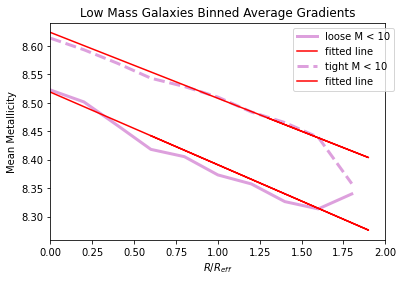

In [81]:
#taking linear regression fit from above and plotting over binned statistic
#want these to trace each other within reason 
meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(loose_low_r,loose_low_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'plum', linewidth = 3, label = 'loose M < 10')

plt.plot(loose_low_r, loose_low_res.intercept + loose_low_res.slope*loose_low_r, 'r', label='fitted line')

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(tight_low_r,tight_low_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'plum', linewidth = 3, label = 'tight M < 10', linestyle = '--')

plt.plot(tight_low_r, tight_low_res.intercept + tight_low_res.slope*tight_low_r, 'r', label='fitted line')

plt.xlim(0,2)
#plt.ylim(8.4,8.8)
plt.xlabel(r'$ R/R_{eff}$')
plt.ylabel('Mean Metallicity')
plt.title('Low Mass Galaxies Binned Average Gradients')
plt.legend(bbox_to_anchor=(1.04, 1))


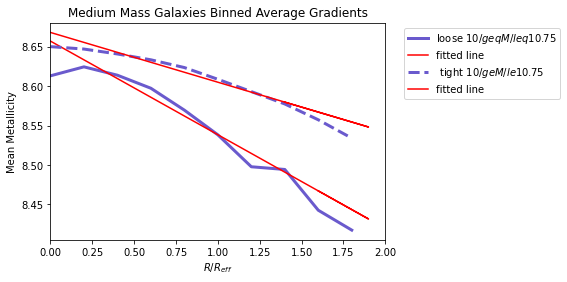

In [82]:
#same as above but for mid mass bins
meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(loose_mid_r,loose_mid_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'slateblue', linewidth = 3, label = (r'loose $ 10/geq M /leq 10.75$'))

plt.plot(loose_mid_r, loose_mid_res.intercept + loose_mid_res.slope*loose_mid_r, 'r', label='fitted line')

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(tight_mid_r,tight_mid_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'slateblue', linewidth = 3, label = (r' tight $10/ge M /le 10.75$'), linestyle = '--')

plt.plot(tight_mid_r, tight_mid_res.intercept + tight_mid_res.slope*tight_mid_r, 'r', label='fitted line')

plt.xlim(0,2)
#plt.ylim(8.4,8.8)
plt.xlabel(r'$ R/R_{eff}$')
plt.ylabel('Mean Metallicity')
plt.title('Medium Mass Galaxies Binned Average Gradients')
plt.legend(bbox_to_anchor=(1.04, 1))

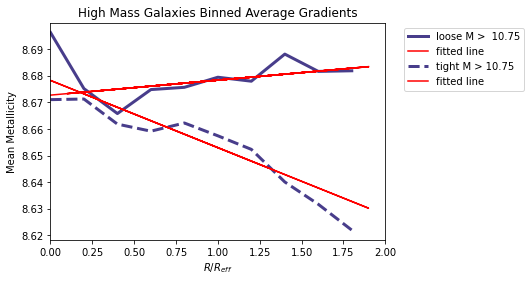

In [83]:
#same as above but for high mass bins
meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(loose_high_r,loose_high_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'darkslateblue', linewidth = 3, label = 'loose M >  10.75')

plt.plot(loose_high_r, loose_high_res.intercept + loose_high_res.slope*loose_high_r, 'r', label='fitted line')

meta_metal_mean,meta_radius_mean,binnumber = sci.binned_statistic(tight_high_r,tight_high_m,bins=10,range=(0,2.0))
plt.plot(meta_radius_mean[:-1], meta_metal_mean, color = 'darkslateblue', linewidth = 3, label = 'tight M > 10.75', linestyle = '--')

plt.plot(tight_high_r, tight_high_res.intercept + tight_high_res.slope*tight_high_r, 'r', label='fitted line')

plt.xlim(0,2)
#plt.ylim(8.4,8.8)
plt.xlabel(r'$ R/R_{eff}$')
plt.ylabel('Mean Metallicity')
plt.title('High Mass Galaxies Binned Average Gradients')
plt.legend(bbox_to_anchor=(1.04, 1))

## Random Mass Matching to Obtain a More Uniform Sample
This isn't the best way to do this and I didn't end up using this method in my thesis but it is a method of doing this. 

In [28]:
frac10 = (len(loose_low)) / (len(tight_low))
fracmid = (len(loose_mid)) / (len(tight_mid))
frac1075 = (len(loose_high)) / (len(tight_high))

print(frac10)
print(fracmid)
print(frac1075)

tight_lowmass_plateifu = tight_low['PLATEIFU_1']
tight_midmass_plateifu = tight_mid['PLATEIFU_1']
tight_highmass_plateifu = tight_high['PLATEIFU_1']

2.0
0.5245901639344263
0.3333333333333333


In [29]:
import random 

# tight_lessthan10_keep = []
# tight_lessthan10_toss = []

# for plateifu in tight_lowmass_plateifu: 
#     number = random.uniform(0,2)
#     if number < frac10:
#         tight_lessthan10_keep.append(plateifu)
#     else: 
#         tight_lessthan10_toss.append(plateifu)
    
tight_midmass_keep = []
tight_midmass_toss = []

for plateifu in tight_midmass_plateifu: 
    number = random.uniform(0,1)
    if number < fracmid:
        tight_midmass_keep.append(plateifu)
    else: 
        tight_midmass_toss.append(plateifu)

tight_greater1075_keep = []
tight_greater1075_toss = []

for plateifu in tight_highmass_plateifu: 
    number = random.uniform(0,1)
    if number < frac1075:
        tight_greater1075_keep.append(plateifu)
    else: 
        tight_greater1075_toss.append(plateifu)